## Estadística Aplicada

Sesión 20 - 19 de octubre

David Eduardo Gómez Marín   1914352     G41

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##Especializadas
#Librerías especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_predict

#estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

##
import pmdarima as pm

In [4]:
##Datos
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True)

In [5]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
#Asignar frecuencia mensual
pasajeros = pasajeros.asfreq('MS')

In [7]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

<Axes: xlabel='Month'>

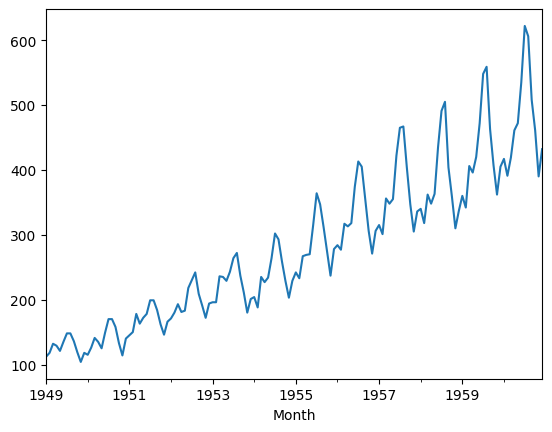

In [9]:
#La serie tiene componente estacional (diferente de estacionario, estacionario significa media, varianza y covarianza constantes), estacional es que tiene picos cada cierto tiempo
pasajeros['Thousands of Passengers'].plot()

Esta serie tiene tendencia positiva y componente estacional

In [10]:
##Verificar que sea estacionaria
prueba_dfa = adfuller(pasajeros['Thousands of Passengers'])
pvalue = prueba_dfa[1]
pvalue.round(2)

0.99

No rechazamos H0, significa que Thousands of passengers es una serie no estacionaria

Aploquemos primeras diferencias para hacerla estacionaria

In [11]:
pasajeros['1ras_diff'] = pasajeros['Thousands of Passengers'].diff()

In [13]:
#Verificar que las primeras diferenias de thousands of passengers sean estacionarias con dickey-fuller
prueba_dfa1 = adfuller(pasajeros['1ras_diff'].dropna())
pvalue1=prueba_dfa1[1]
pvalue1.round(3)

0.054

No rechazamos H0, por lo que tampoco es estacionaria. Igualmente ver la grafica y volver a aplicar primeras diferencias y coprobar si queda estacionaria

<Axes: xlabel='Month'>

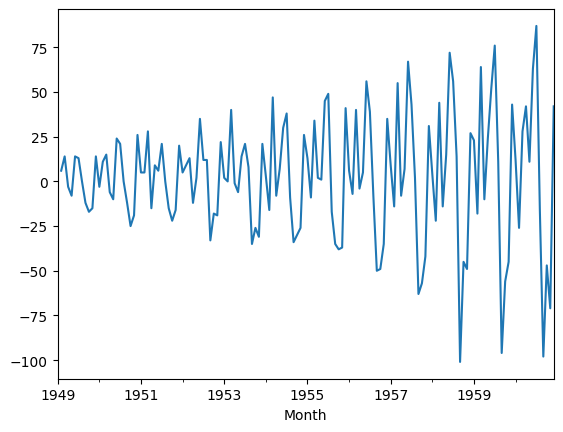

In [14]:
pasajeros['1ras_diff'].plot()

In [15]:
pasajeros['2das_diff']=pasajeros['1ras_diff'].diff()

<Axes: xlabel='Month'>

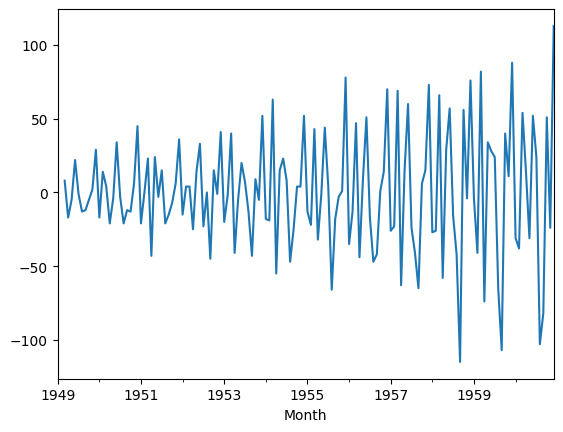

In [16]:
pasajeros['2das_diff'].plot()

In [18]:
#Verificar que las primeras diferenias de thousands of passengers sean estacionarias con dickey-fuller
prueba_dfa2 = adfuller(pasajeros['2das_diff'].dropna())
pvalue2=prueba_dfa2[1]
pvalue2.round(3)

0.0

Rechazamos H0, por lo que las segundas diferencias de Thousands of passengers son estacionaias

* pasajeros I(2)
* 1ras diferencias I(1)
* 2das diferecias I(0)

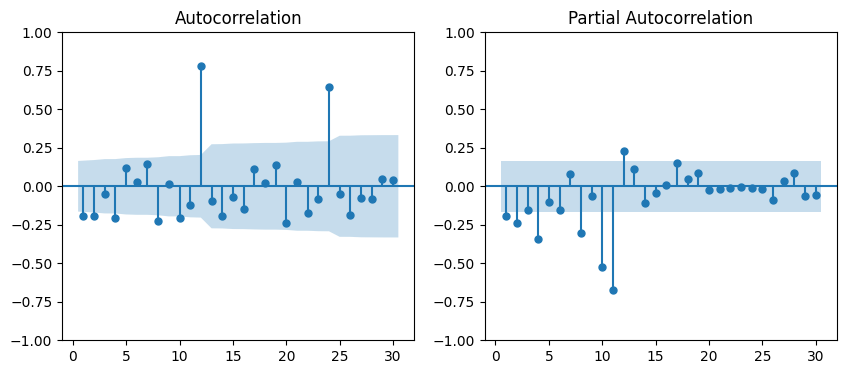

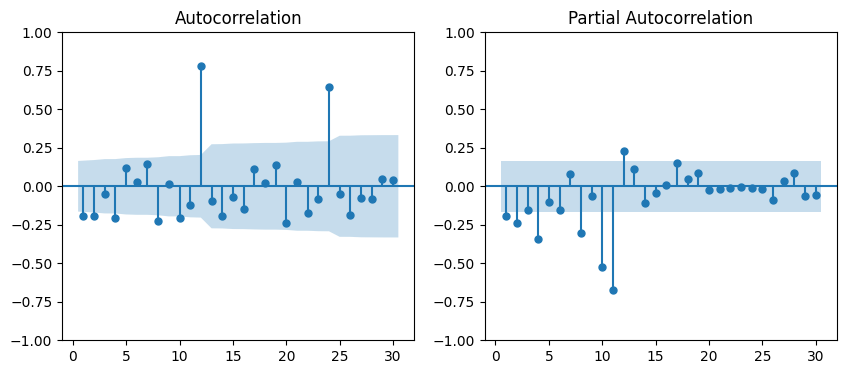

In [20]:
#Gradicas de autocorrelación
ig, ax=plt.subplots(1,2,figsize=(10,4))
plot_acf(pasajeros['2das_diff'].dropna(), zero=False, lags=30,ax=ax[0])
plot_pacf(pasajeros['2das_diff'].dropna(), zero=False, lags=30,ax=ax[1])

Dado que cada 12 meses hay picos
Esto nos confirma que es una serie estacional

In [27]:
#Para determinar el orden 
#Vamos a utilizar auto_arima
pm.auto_arima(pasajeros['Thousands of Passengers'],
              start_p=1, max_p=7,
              start_q=1, max_q=7,
              m=12,
              ic='aic',
              seasonal=True,
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

autoarima nos sugiere SARIMA(0,1,1)(2,1,0,12)

In [29]:
## Estimar modelo
model = ARIMA(pasajeros['Thousands of Passengers'],
              order=(0,1,1),
              seasonal_order=(2,1,0,12))
results = model.fit()


In [30]:
#Pronosticar
results.predict('1961-01-01','1963-12-01')

1961-01-01    451.347076
1961-02-01    427.102222
1961-03-01    463.382490
1961-04-01    499.705771
1961-05-01    514.035525
1961-06-01    571.851867
1961-07-01    661.310508
1961-08-01    648.081675
1961-09-01    551.284691
1961-10-01    501.068279
1961-11-01    434.052984
1961-12-01    479.233768
1962-01-01    495.569171
1962-02-01    469.578456
1962-03-01    497.955024
1962-04-01    544.916438
1962-05-01    556.350007
1962-06-01    616.910052
1962-07-01    708.165787
1962-08-01    689.435153
1962-09-01    592.107043
1962-10-01    544.008548
1962-11-01    471.532195
1962-12-01    516.127935
1963-01-01    534.240091
1963-02-01    508.800960
1963-03-01    539.738523
1963-04-01    584.297670
1963-05-01    596.726148
1963-06-01    655.955970
1963-07-01    747.458851
1963-08-01    729.939146
1963-09-01    632.906669
1963-10-01    583.931319
1963-11-01    512.892704
1963-12-01    558.168624
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
#Pronosticar
results.forecast('1961-01-01','1963-12-01')

In [32]:
#pronosticar pasado
pasajeros['pronostico sarima'] = results.predict()

<Axes: xlabel='Month'>

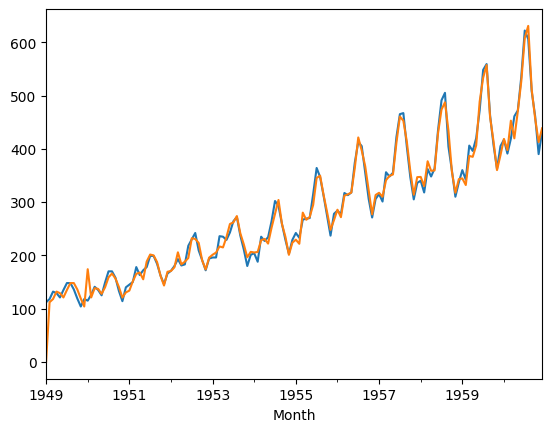

In [33]:
pasajeros['Thousands of Passengers'].plot()
pasajeros['pronostico sarima'].plot()

<Axes: xlabel='Month'>

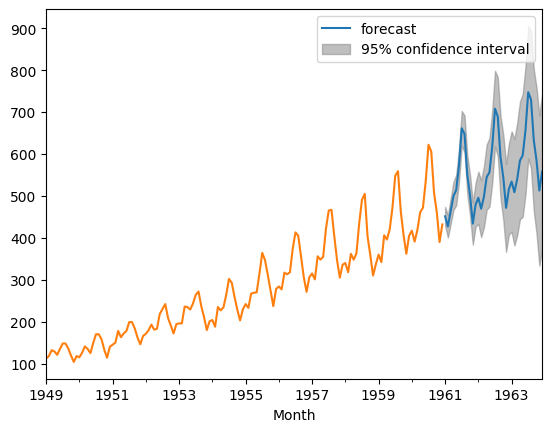

In [34]:
##Graficar el pronostico
plot_predict(results, '1961-01-01','1963-12-01')
pasajeros['Thousands of Passengers'].plot()
